In [150]:
#importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [185]:
#carregar arquivo.csv

#arquivo_path = 'seno_data.csv'

arquivo_path = 'autoprice_data.csv' # Hipotese, a coluna 15 depende da coluna 6 e da coluna 7. 
                                    # O grafico de dispersao demonstrou uma tendencia linear positiva

data = pd.read_csv(arquivo_path, header=None)

# Ver dataset
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
1,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
2,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710
3,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875
4,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
155,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
156,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
157,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


In [186]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       159 non-null    int64  
 1   1       159 non-null    int64  
 2   2       159 non-null    float64
 3   3       159 non-null    float64
 4   4       159 non-null    float64
 5   5       159 non-null    float64
 6   6       159 non-null    int64  
 7   7       159 non-null    int64  
 8   8       159 non-null    float64
 9   9       159 non-null    float64
 10  10      159 non-null    float64
 11  11      159 non-null    int64  
 12  12      159 non-null    int64  
 13  13      159 non-null    int64  
 14  14      159 non-null    int64  
 15  15      159 non-null    int64  
dtypes: float64(7), int64(9)
memory usage: 20.0 KB


Text(0.5, 1.0, 'Correlação de Pearson')

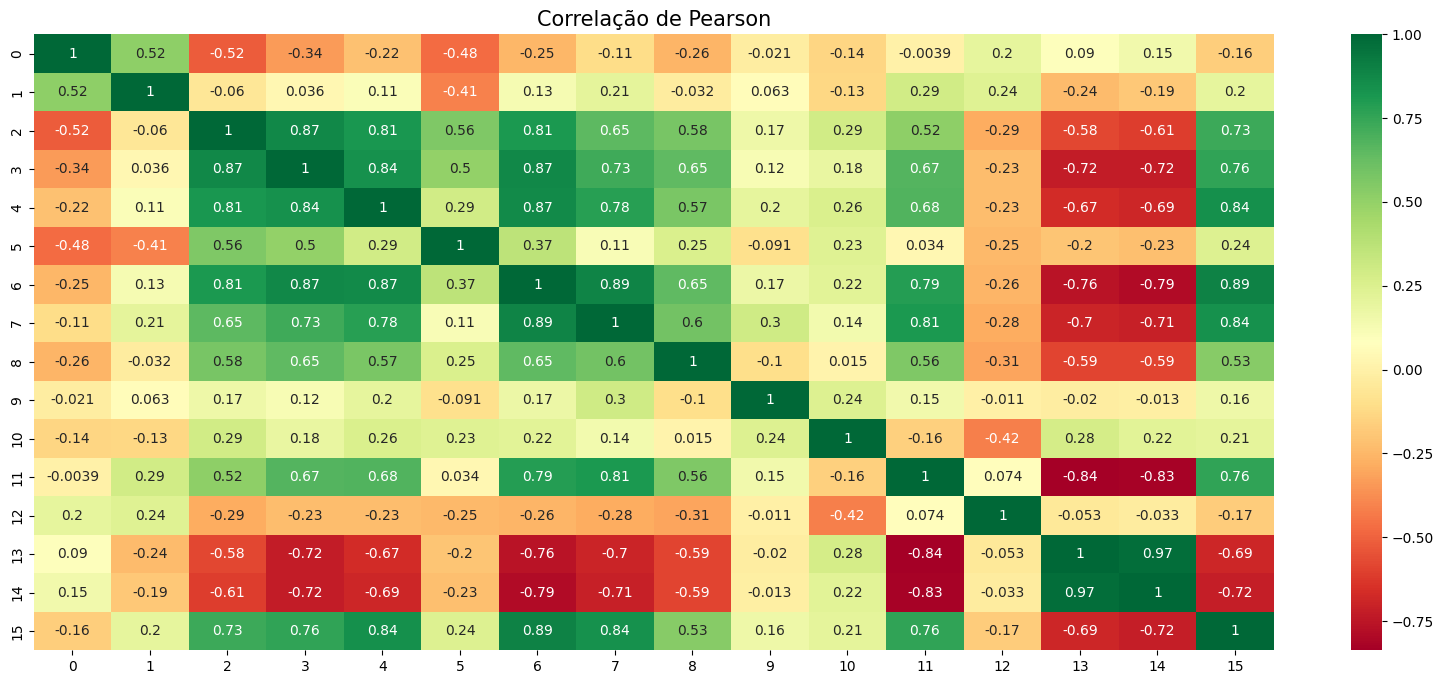

In [192]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), annot = True, cmap= "RdYlGn")
plt.title('Correlação de Pearson',size=15)

# Coeficiente de Correlação de Pearson (padrão): Mede a relação linear entre duas variáveis contínuas. 

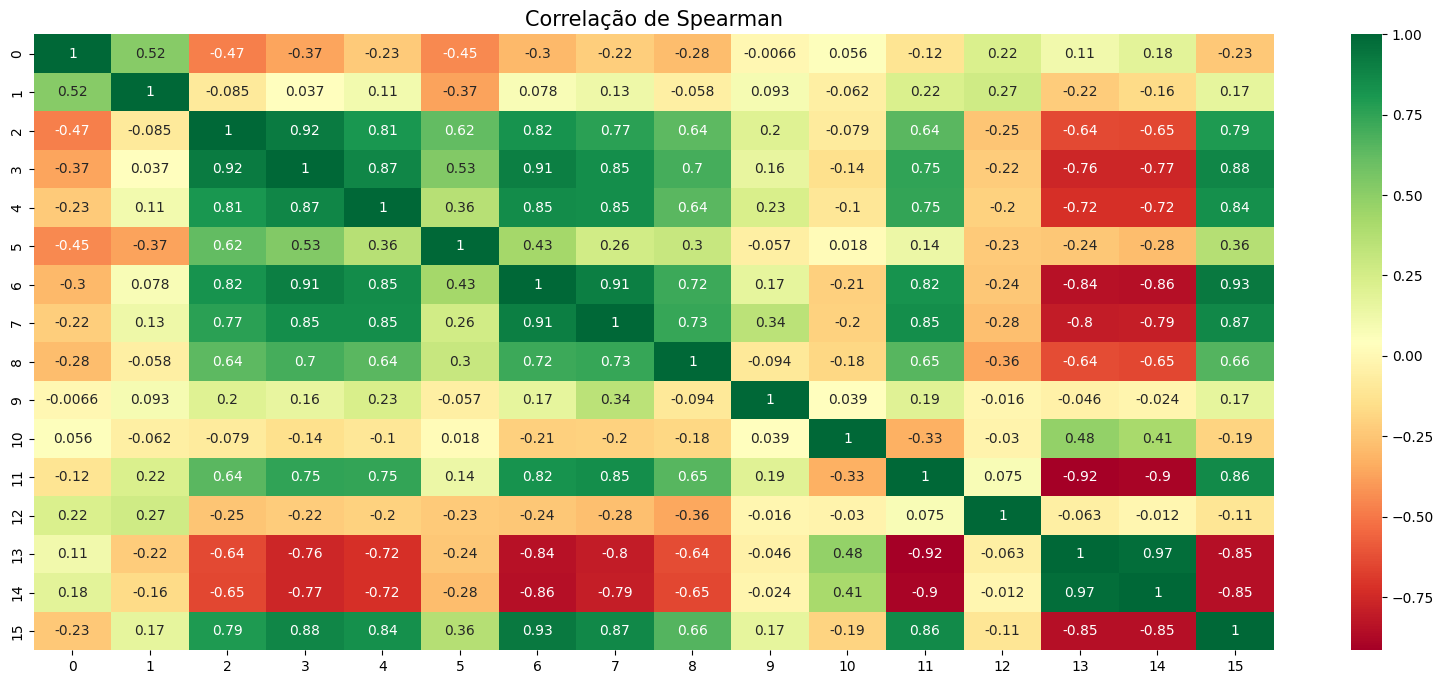

In [193]:
plt.figure(figsize=(20,8))
plt.title('Correlação de Spearman',size=15)
sns.heatmap(data.corr('spearman'), annot = True, cmap= "RdYlGn")

# Coeficiente de Correlação de Spearman: Mede a relação monotônica (não necessariamente linear) entre duas variáveis.

C:\Users\user\AppData\Local\Temp\ipykernel_15576\262969193.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x=data[6], y=data[15], palette='Set2')


<Axes: xlabel='6', ylabel='15'>

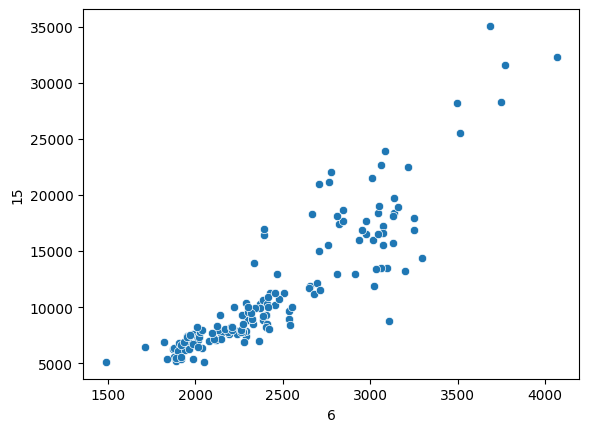

In [154]:
#plotar o grafico de dispersao
sns.scatterplot(data=data, x=data[0], y=data[-1], palette='Set2')

# Regressao simples

In [155]:
X = data.iloc[:, 6].values.reshape(-1, 1)  # Redimensiona para uma matriz bidimensional e 
y = data.iloc[:, -1].values

In [156]:
# Separaçao dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [157]:
# Criar e treinar um modelo de regressao linear simples
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [158]:
# Fazer as prediçoes do modelo
y_pred = model.predict(X_test)


array([160.63227523, 152.16445336, 123.67137704, 113.02938469,
       135.51488467, 113.42988978, 104.79042286,  92.37476511,
        99.01170658, 104.10384271,  75.72519642,  93.11856028,
        91.51653992,  93.74792542,  92.71805519, 118.75088595,
       123.04201191, 103.01675747, 140.6070208 ,  91.51653992,
       151.76394827, 138.54728034,  85.05124349,  84.93681346,
       108.90990377, 109.31040886, 138.3756353 , 115.31798519,
       110.3974941 , 151.93559331, 115.83292031, 157.3138045 ,
       157.3138045 , 150.27635794, 140.43537576,  90.25780964,
       192.27217724, 116.46228545,  92.60362516, 107.88003355,
       105.64864805, 147.98775743, 109.31040886, 136.65918492,
        90.48666969,  88.99907936, 163.77910093,  88.7130043 ])

In [177]:
# Imprima as métricas
print('Erro Médio Quadrático (MSE): %.2f' % mean_squared_error(y_test, y_pred))
print('Coeficiente de Determinação (R-squared): %.2f' % r2_score(y_test, y_pred))
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))

Erro Médio Quadrático (MSE): 33729779.10875767
Coeficiente de Determinação (R-squared): -0.24117424446703817
MAE: 4124.33


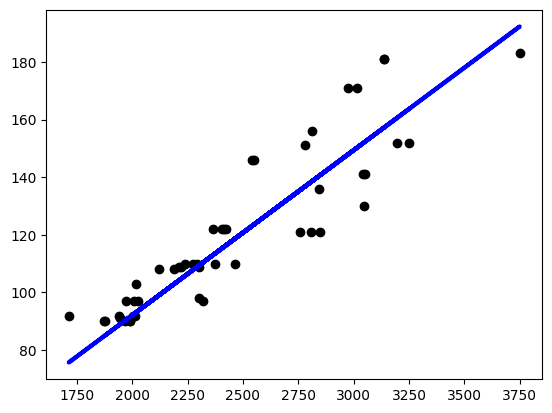

In [160]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

# Regressao multipla

In [161]:
X1 = data.iloc[:, 6].values.reshape(-1, 1)  # Redimensiona para uma matriz bidimensional
X2 = data.iloc[:, 7].values.reshape(-1, 1)
X = np.hstack((X1, X2))
y = data.iloc[:, 15].values

In [162]:
# Separaçao dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [163]:
# Criar e treinar um modelo de regressao multipla
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [164]:
# Fazer as prediçoes do modelo
y_pred = model.predict(X_test)

In [165]:
# Imprima as métricas
print('Erro Médio Quadrático (MSE): %.2f' % mean_squared_error(y_test, y_pred))
print('Coeficiente de Determinação (R-squared): %.2f' % r2_score(y_test, y_pred))
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))

Erro Médio Quadrático (MSE): 5452019.715132204
Coeficiente de Determinação (R-squared): 0.7993788684791109


# SVR

In [195]:
X1 = data.iloc[:, 6].values.reshape(-1, 1)  # Redimensiona para uma matriz bidimensional
X2 = data.iloc[:, 7].values.reshape(-1, 1)
X = np.hstack((X1, X2))
y = data.iloc[:, 15].values                 # Coluna de caracteristica dependente

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [197]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [198]:
y_pred = model.predict(X_test)

In [200]:
# Imprima as métricas
print('Erro Médio Quadrático (MSE): %.2f' % mean_squared_error(y_test, y_pred))
print('Coeficiente de Determinação (R-squared): %.2f' % r2_score(y_test, y_pred))
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))

Erro Médio Quadrático (MSE): 33729779.11
Coeficiente de Determinação (R-squared): -0.24
MAE: 4124.33
